In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, 
# чтобы успешно отбить нападения на различные области.

# Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

# Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел 
# число крейсеров, транспортников и истребителей."""

In [3]:
inv_data = pd.read_csv('D:\\AnacondaData\\Invaders\\invasion.csv')

In [4]:
inv_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [5]:
X_train = inv_data.drop('class', axis=1)
y_train = inv_data['class']

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
clf = RandomForestClassifier(random_state=0)

In [8]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
grid_clf = GridSearchCV(clf, parametrs, cv=3, n_jobs=-1)

In [11]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [12]:
grid_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [13]:
best_clf = grid_clf.best_estimator_

In [14]:
feature_importances = best_clf.feature_importances_

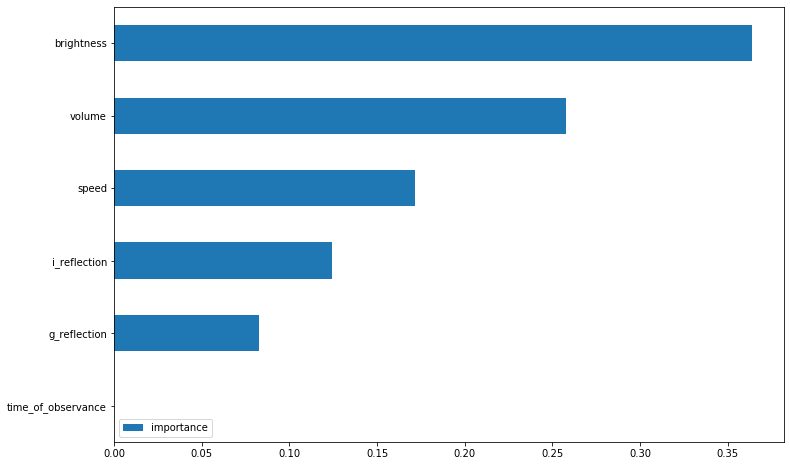

In [15]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [16]:
testing_inv_data = pd.read_csv('D:\\AnacondaData\\Invaders\\operative_information.csv')

In [17]:
testing_inv_data.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [18]:
X_test = testing_inv_data

In [19]:
y_pred = best_clf.predict(X_test)

In [20]:
y_pred

array(['fighter', 'transport', 'transport', ..., 'transport', 'fighter',
       'transport'], dtype=object)

In [21]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [22]:
# Вторая задача из "Цикла Космоса"
# Теперь нужно выявлять опасные регионы космоса, где могут находиться враги.
#
# Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [23]:
space_data = pd.read_csv('D:\\AnacondaData\\Invaders\\space_can_be_a_dangerous_place.csv')

In [24]:
space_data.head(10)

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
5,206.6,13.0,27.2712,-0.233592,0,1,1,1
6,293.0,263.0,38.6760,-0.870781,0,1,1,1
7,83.1,205.0,10.9692,0.925809,0,1,1,1
8,53.0,305.0,6.9960,0.327122,0,1,1,1
9,35.1,189.0,4.6332,-0.726962,0,1,1,1


In [25]:
space_data.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


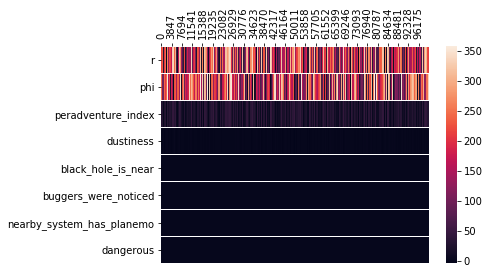

In [26]:
g=sns.heatmap(space_data.T)
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [27]:
space_data.groupby('buggers_were_noticed').agg({'dangerous':'mean'}) 

,dangerous
buggers_were_noticed,
0,0.528782
1,0.930118


In [36]:
X_train_space = space_data.drop('dangerous', axis=1)
y_train_space = space_data['dangerous']

In [37]:
space_clf = RandomForestClassifier(random_state=0)

In [38]:
space_parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5 , 7, 10]}

In [40]:
space_grid_clf = GridSearchCV(space_clf, space_parameters, cv=3, n_jobs=-1)

In [41]:
# ЦП 100% на 20 минут 
space_grid_clf.fit(X_train_space, y_train_space)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [42]:
best_space_clf = space_grid_clf.best_estimator_

In [43]:
feature_importances = best_space_clf.feature_importances_

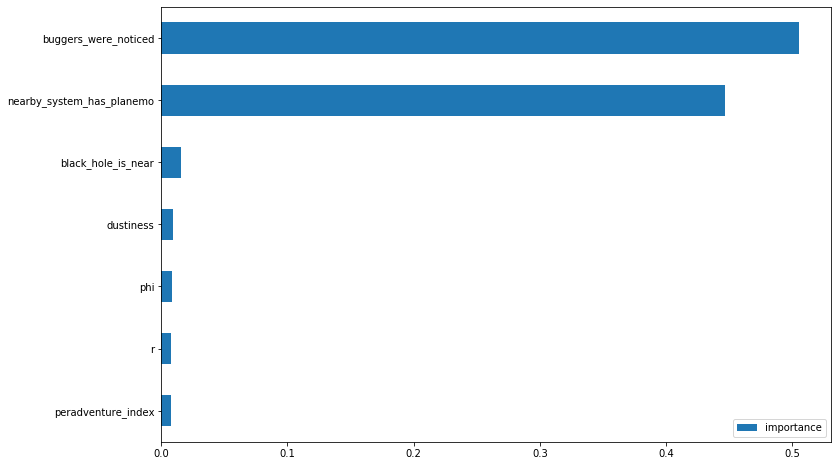

In [44]:
imp = pd.DataFrame(best_space_clf.feature_importances_, index=X_train_space.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))